In [2]:
import os

QM9_path = os.environ["DATA"] + "/00_datasets/DFT/QM9/filtered_QM9_charges_radicals_stereo.smi"
json_cache_location = os.environ["DATA"] + "/00_datasets/DFT/QM9/cache_QM9.json"

dft_path = "/tmp"

output_fig_path = os.environ["FIGURES"] + "/00_datasets/QM9/"

os.makedirs(output_fig_path, exist_ok=True)

In [3]:
def load_dataset(path):
    with open(path, "r") as f:
        smiles_list = [line.split()[0] for line in f.readlines()]
    return smiles_list

In [4]:
QM9_smi = load_dataset(QM9_path)


In [5]:
from evomol.evaluation_dft import OPTEvaluationStrategy
import tqdm

s_qed = OPTEvaluationStrategy("homo", n_jobs=2, cache_files=[json_cache_location], 
                              working_dir_path=dft_path, MM_program="rdkit")

def calc_HOMO(smiles_list):
    QED_values = [s_qed.eval_smi(smi) for smi in tqdm.tqdm(smiles_list)]
    return QED_values

DFT MM rdkit
133798 molecules in cache


In [6]:
QM9_HOMO = calc_HOMO(QM9_smi)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 132040/132040 [00:57<00:00, 2296.15it/s]


In [8]:
import numpy as np

In [65]:
np.min(QM9_HOMO)

-11.66280604

In [10]:
np.max(QM9_HOMO)

-3.6055105000000003

In [68]:
np.mean(QM9_HOMO)

-6.5353933452808235

In [69]:
np.median(QM9_HOMO)

-6.560668540000001

In [63]:
s_qed.eval_smi("C")

-10.54985978

In [66]:
np.argmin(QM9_HOMO)

182

In [67]:
QM9_smi[182]

'FC(F)(F)F'

In [14]:
import numpy as np

data = {
    "Jeu de données": np.full(len(QM9_HOMO), "QM9"),
    "QED": QM9_HOMO 
}

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

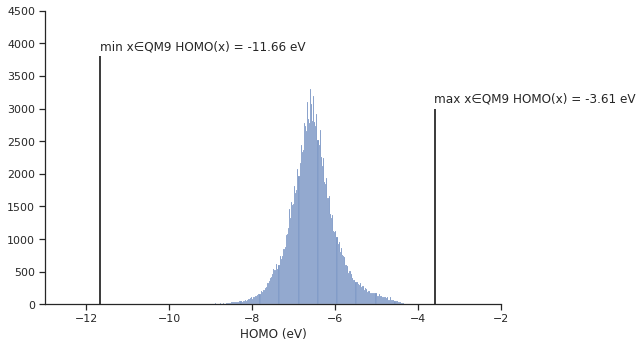

In [62]:


plt.figure(figsize=(9,5))
sns.histplot(QM9_HOMO)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)

plt.xlim(-13, -2)
plt.ylim(0, 4500)
plt.ylabel("")
plt.vlines(np.max(QM9_HOMO), 0, 3000, color="black")
plt.text(np.max(QM9_HOMO)-0.005 ,3100 , "max x∈QM9 HOMO(x) = -3.61 eV")
plt.xlabel("HOMO (eV)")

plt.vlines(np.min(QM9_HOMO), 0, 3800, color="black")
plt.text(np.min(QM9_HOMO)-0.005 ,3900 , "min x∈QM9 HOMO(x) = -11.66 eV")
plt.tight_layout()

sns.despine(bottom = False, left = False)

plt.savefig(os.path.join(output_fig_path, "distrib_HOMO_QM9_filtered_ChEMBL_CNOF_filtered"), dpi=200)

In [39]:
np.max(ChEMBL_QED)

NameError: name 'ChEMBL_QED' is not defined

In [12]:
ChEMBL_smi[np.argmax(ChEMBL_QED)]

'CN(C)CCC(=O)N1c2ccccc2NC(=O)c2ccccc21'

In [13]:
np.max(QM9_QED)

0.6687972090186459

In [14]:
QM9_smi[np.argmax(QM9_QED)]

'CCCNc1ccco1'

In [15]:
mask_ChEMBL_inf = np.array(ChEMBL_QED) < np.max(QM9_QED)

In [17]:
ChEMBL_filtered_smi, ChEMBL_filtered_QED = np.array(ChEMBL_smi)[mask_ChEMBL_inf], np.array(ChEMBL_QED)[mask_ChEMBL_inf]

In [18]:
data["dataset"] = np.concatenate([data["dataset"], np.full(len(ChEMBL_filtered_smi), "ChEMBL_filtered")])
data["qed"] = np.concatenate([data["qed"], ChEMBL_filtered_QED])

<AxesSubplot:xlabel='qed', ylabel='Count'>

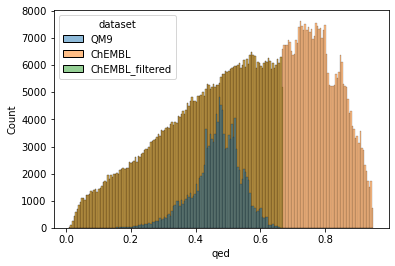

In [19]:
sns.histplot(data=data, x="qed", hue="dataset")

In [20]:
import csv

# with open(ChEMBL_filtered_path, "w") as f:
#     writer = csv.writer(f)
#     rows = [[smi] for smi in ChEMBL_filtered_smi]
#     writer.writerows(rows)

In [21]:
len(ChEMBL_QED)

867606

In [22]:
len(ChEMBL_filtered_QED)

538454

In [23]:
np.mean(ChEMBL_QED)

0.564970754575306

In [24]:
np.mean(ChEMBL_filtered_QED)

0.43059014861669825

In [25]:
np.mean(QM9_QED)

0.4662444626063514